In [1]:
from numpy import sqrt
from numpy.random import rand, randn
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import erfc
  
N = 1000000
EbNodB_range = range(-2,11)
itr = len(EbNodB_range)
ber = [None]*itr
ber_sim = [None]*itr

for n in range (0, itr): 
 
    EbNodB = EbNodB_range[n]   
    EbNo=10.0**(EbNodB/10.0)
    tx_symbol = 2 * (rand(N) >= 0.5) - 1
    noise_std = 1/sqrt(2*EbNo)
    y = tx_symbol + noise_std * randn(N)
    y_d = 2 * (y >= 0) - 1
    errors = (tx_symbol != y_d).sum()
    ber[n] = 1.0 * errors / N
    #ber_sim[n] = .5*(1-sqrt(EbNo/(EbNo+1)))
    ber_sim[n] = .5*erfc(sqrt(EbNo))

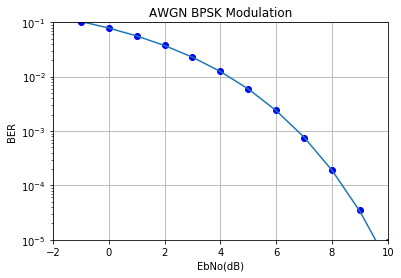

In [2]:
plt.plot(EbNodB_range, ber, 'bo')
plt.plot(EbNodB_range,ber_sim)
plt.axis([-2, 10, 1e-5, 0.1])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BER')
plt.grid(True)
plt.title('AWGN BPSK Modulation')
plt.show()

In [3]:
from numpy import sqrt
import random
import matplotlib.pyplot as plt
  
N = 100000
EbNodB_range = range(-1, 35)
itr = len(EbNodB_range)
ber_sim = [None]*itr
ber = [None]*itr
tx_symbol = 0
noise = 0 
ch_coeff = 0
rx_symbol = 0 
det_symbol = 0 


for n in range (0, itr): 
 
    EbNodB = EbNodB_range[n]   
    EbNo=10.0**(EbNodB/10.0)
    noise_std = 1/sqrt(2*EbNo)
    noise_mean = 0
    no_errors = 0
    
    for m in range (0, N):
        tx_symbol = 2*random.randint(0,1)-1
        noise = random.gauss(noise_mean, noise_std)
        ch_coeff = sqrt(random.gauss(0,1)**2+random.gauss(0,1)**2)/sqrt(2)
        rx_symbol = tx_symbol*ch_coeff + noise
        det_symbol = 2 * (rx_symbol >= 0) - 1
        no_errors += 1*(tx_symbol != det_symbol)  

    ber_sim[n] = .5*(1-sqrt(EbNo/(EbNo+1)))
    ber[n] = no_errors / N
    
    #print "EbNodB:", EbNodB
    #print "Numbder of errors:", no_errors
    #print "Error probability:", ber[n] 


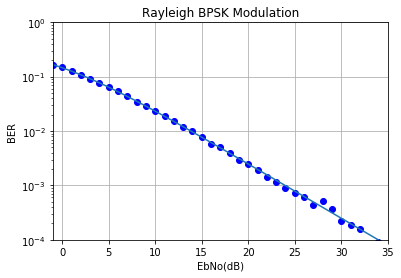

In [4]:
plt.plot(EbNodB_range, ber, 'bo')
plt.plot(EbNodB_range, ber_sim)
plt.axis([-1, 35,1e-4, 1])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BER')

plt.grid(True)
plt.title('Rayleigh BPSK Modulation')
plt.show()

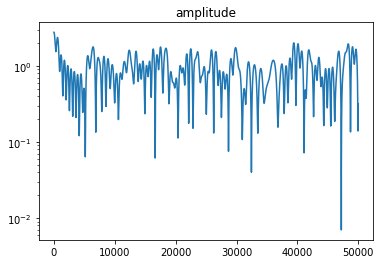

c:\users\samuel\anaconda3\envs\autoencoder\lib\site-packages\ipykernel_launcher.py:63: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


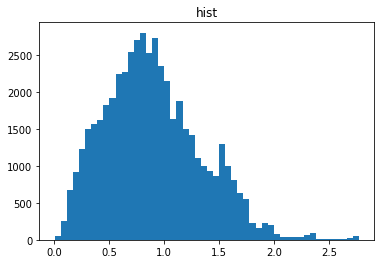

In [5]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt


def Jakes_Flat(fd, Ts, Ns, t0=0, E0=1, phi_N=0):
    '''
    Inputs:
    fd      : Doppler frequency
    Ts      : sampling period
    Ns      : number of samples
    t0      : initial time
    E0      : channel power
    phi_N   : inital phase of the maximum doppler frequency sinusoid
    Outputs:
    h       : complex fading vector
    t_state : current time
    '''
    N0 = 8
    N = 4 * N0 + 2
    wd = 2 * np.pi * fd
    t = t0 + np.asarray([i for i in range(0, Ns)]) * Ts
    # tf = t0 + Ns * Ts
    coff = E0 / np.sqrt(2 * N0 + 1)

    phi_n = np.asarray([np.pi * i / (N0 + 1) for i in range(1, N0 + 1)])
    phi_N = 0
    w_n = np.asarray([wd * np.cos(2 * np.pi * i / N) for i in range(1, N0 + 1)])

    h_i = np.ones((N0 + 1, Ns))
    for i in range(N0):
        h_i[i, :] = 2 * np.cos(phi_n[i]) * np.cos(w_n[i] * t)
    h_i[N0, :] = np.sqrt(2) * np.cos(phi_N) * np.cos(wd * t)

    h_q = np.ones((N0 + 1, Ns))
    for i in range(N0):
        h_q[i, :] = 2 * np.sin(phi_n[i]) * np.cos(w_n[i] * t)
    h_q[N0, :] = np.sqrt(2) * np.sin(phi_N) * np.cos(wd * t)

    h_I = coff * np.sum(h_i, 0)
    h_Q = coff * np.sum(h_q, 0)

    return h_I, h_Q


# test
fd = 926
Ts = 1e-6
Ns = 50000
t0 = 0
E0 = 1
phi_N = 0

h_I, h_Q = Jakes_Flat(fd, Ts, Ns)

plt.figure("amplitude")
plt.title("amplitude")
plt.plot(np.sqrt(h_Q * h_Q + h_I * h_I))
plt.yscale('log')
plt.show()
plt.figure("hist")
plt.title("hist")
n, bins, patches = plt.hist(np.sqrt(h_Q * h_Q + h_I * h_I), bins=50, normed=0)
plt.show()